In [1]:
import pandas as pd
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="customerchurn",
    user="postgres",
    password="Mousam@2003",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

query = "SELECT * FROM vw_ChurnData;"

df = pd.read_sql(query, conn)

print(df.head())

conn.close()



C:\Users\mousa\AppData\Local\Temp\ipykernel_1164\3347712244.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  customer_id  gender  age married        state  number_of_referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                27       None           Yes             No  ...   
1                13       None           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8       None           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [2]:
df.to_csv("viewChurndata.csv",index=False)

In [3]:
churndata=pd.read_csv("viewchurndata.csv")
churndata

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,43397-UTT,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,...,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned,Competitor,Competitor made better offer
6003,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,No,...,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed,Others,Others
6004,78682-KER,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,...,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction
6005,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed,Others,Others


In [4]:
churndata["customer_status"].unique()

array(['Stayed', 'Churned'], dtype=object)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [6]:
# Drop columns that won't be used for prediction
churndata = churndata.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)


In [7]:
# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]


In [8]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    churndata[column] = label_encoders[column].fit_transform(churndata[column])

# Manually encode the target variable 'Customer_Status'
churndata['customer_status'] = churndata['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = churndata.drop('customer_status', axis=1)
y = churndata['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Make predictions
y_pred = rf_model.predict(X_test)



In [11]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[788  50]
 [137 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       838
           1       0.82      0.62      0.71       364

    accuracy                           0.84      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [12]:

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


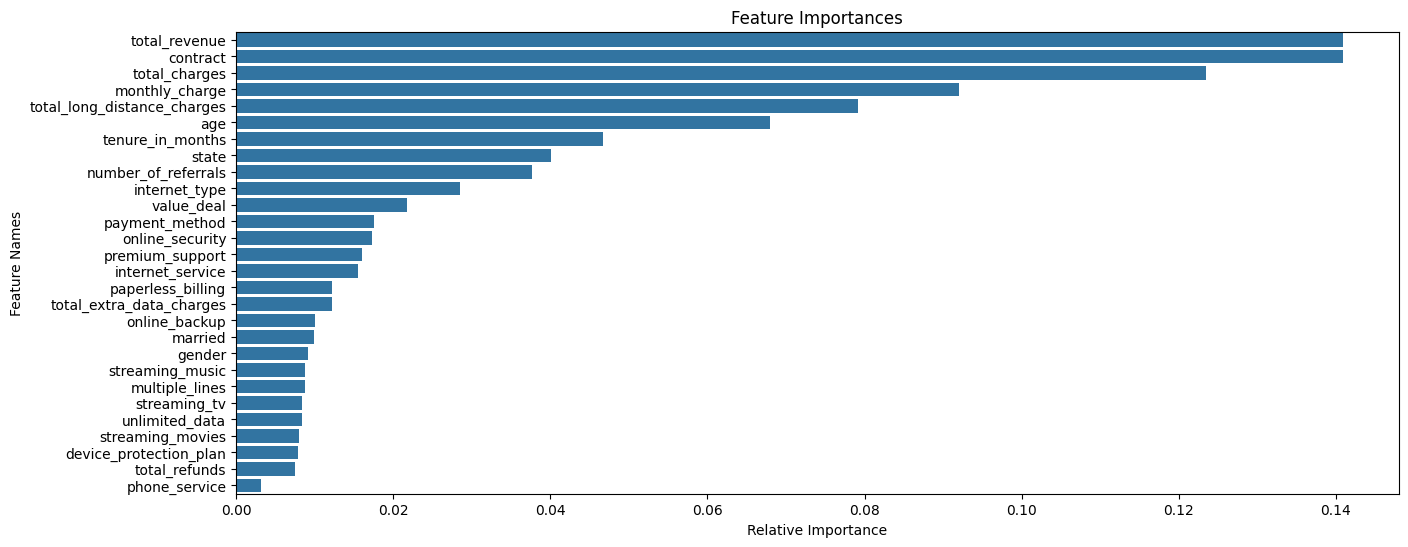

In [13]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [14]:
conn = psycopg2.connect(
    dbname="customerchurn",
    user="postgres",
    password="Mousam@2003",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

query = "SELECT * FROM vw_joinData;"

df = pd.read_sql(query, conn)

print(df.head())

conn.close()

  customer_id  gender  age married           state  number_of_referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7       None           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18       None           Yes             No  ...   
4                 5       None           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

C:\Users\mousa\AppData\Local\Temp\ipykernel_1164\539596804.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [15]:
df.to_csv("predictiondata.csv",index=False)

In [16]:
new_data=pd.read_csv("predictiondata.csv")

In [17]:
new_data

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.30,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.00,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.70,0.0,0,3.62,37.32,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,Joined,Others,Others
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,Credit Card,44.00,44.00,0.0,0,26.15,70.15,Joined,Others,Others
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,Credit Card,45.60,45.60,0.0,0,37.44,83.04,Joined,Others,Others
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,NaN,Yes,No,...,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,Joined,Others,Others


In [18]:
# Display the first few rows of the fetched data
print(new_data.head())

  customer_id  gender  age married           state  number_of_referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [19]:
# Convert all column names to lowercase (if not already)
original_data = new_data.copy()

# Now use lowercase everywhere
customer_ids = new_data['customer_id']
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)


In [20]:
# Use errors='ignore' to avoid KeyError if a column is missing
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1, errors='ignore')


In [21]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [22]:
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [23]:
original_data.to_csv(r"C:\Users\mousa\Downloads\Predictions.csv", index=False)